<center><img src="https://minas.medellin.unal.edu.co/images/noticias/logoUN.gif" alt="logo" width="250"></center>


<center> <h2> Examen Parcial </h2> </center>
<center> <h2> Visión Artificial </h2> </center>
<center> <h2> 2024-2S </h2> </center>

### Nota:
Todo punto debe de tener una explicación de lo que se está haciendo y por qué se está haciendo, de lo contrario no se tendrá en cuenta (se pone 0 en el punto).

### Datos Personales:
- Nombre: Miller Alexis Quintero García
- Código: 1000214103
- Correo: miquinterog@unal.edu.co


### Librerias


In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import skimage.morphology as morph

## Objetivos
Utilizando la imagen que se encuentra en la carpeta *res*, realizar los puntos del examen. Cada punto tiene el objetivo de evaluar su conocimiento de la asignatura, teniendo en cuenta que su tarea principal es poder segmentar su objeto de interés: Gato real

<img src="res\Gato Real.jpg" alt="Gato real">

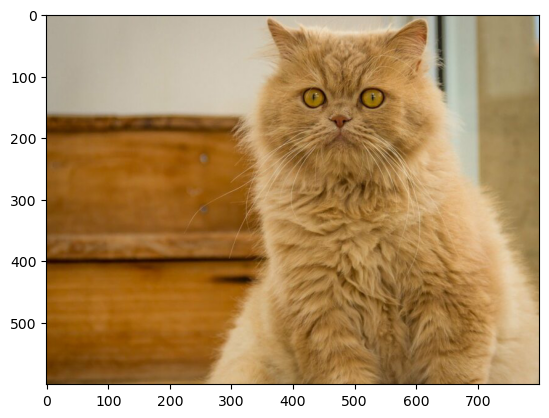

In [2]:
# Hago primero una variable  general que va a tener la imagen del gato, para usarla de forma global en el Notebook, por defecto lee la imagen en BGR
gato = cv2.imread('res/Gato Real.jpg') 
gato_rgb = cv2.cvtColor(gato, cv2.COLOR_BGR2RGB)
plt.imshow(gato_rgb);

## Punto 1 (30%)
Aplique ruido (Sal y Pimienta) a la imagen y muestre el resultado, para luego aplicar un filtro y comparar los resultados.
<br>
Resultado esperado: Imagen con ruido Sal y Pimienta y sin ruido Sal y Pimienta, estas imágenes se deben de obtener implementando ALGORITMOS PROPIOS, NO SE ACEPTA EL USO DE LIBRERIAS.

In [3]:
"""El ruido de sal y pimienta consiste baśicamente en pixeles con valores (0,0,0) y (255,255,255)
para implementarlo simplemente vamos a crear una función que emplea una distribución de probabilidades
aleatorias, la cuál se usara como una "base" de coordenadas de donde un pixel será o no, pixel de sal ó pimienta."""
def salt_and_pepper(img_input, amount = 0.1):
    # Creamos una copia de la img_input
    img = img_input.copy()

    # Revisamos la dimensionalidad de nuestra imagen
    if len(img.shape) == 3:
        pepper = (0, 0, 0)
        salt = (255, 255, 255)
    else:
        pepper = 0
        salt = 255
    # Creamos nuestra distribución de probabilidades aletoria
    probs = np.random.random(img.shape[:2])

    """Aplicamos ahora entonces el ruido, esto es pimienta para aquellos puntos con probabilidad 
    menor a amount/2, y sal para aquellos con probabilidad mayor a 1 - amount/2, lo cual 
    estadísticamente es como tomar las colas de la distribución de probabilidades"""
    img[probs < amount/2] = pepper
    img[probs > (1 - (amount/2))] = salt

    return img

In [4]:
"""Lo siguiente es crear el filtro para mitigar el ruido sal y pimienta, lo mejor en este caso es implementar un
filtro de mediana pues la sal y pimienta son datos atípicos extremadamente altos o bajos, por lo cual una mediana
permitirá tomar el valor apropiado de intensidad en el espacio que barre el kernel"""

# Función de aplicación de kernel de mediana sobre la imagen bajo los parámetros:
# imagen de entrada, valores en x,y, además del radio del kernel 'r'
def apply_kernel(img, x, y, r):
    list_values = []
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            # Tomamos el valor para ir guardando en la lista
            list_values.append(img[x+i][y+j])
    # Al final organizamos la lista y tomamos el valor de la mitad (mediana)
    list_values.sort()
    return (list_values[len(list_values)//2])

def median_filter(img_input, r = 1):
    img = np.zeros_like(img_input, dtype=np.uint8)
    # Recorremos todos los valores i,j de la imagen, en el intervalo del radio del kernel
    for i in range(r,img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            median_value = apply_kernel(img_input, i, j, r)
            # Asignamos el valor de la mediana a la imagen de salida
            img[i,j] = median_value
    return img

# Ahora, necesitamos poder aplicar esto a cada canal de color de la imagen, usamos programación funcional
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], args)
    res[:,:,1] = f(img[:,:,1], args)
    res[:,:,2] = f(img[:,:,2], args)

    return res

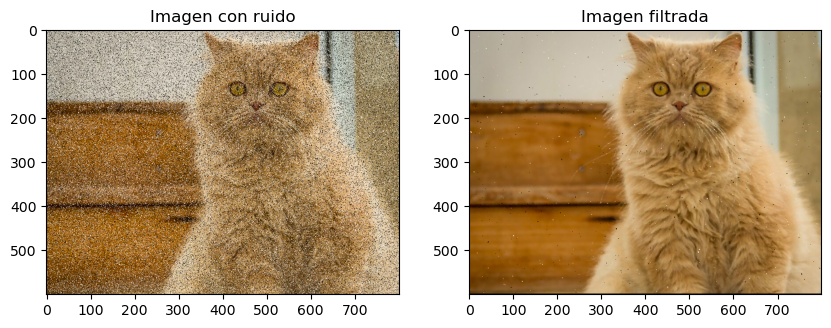

In [5]:
# Vamos entonces ahora a implementar la aplicación del ruido sal y pimienta
gato_noise = salt_and_pepper(gato_rgb, 0.2)
# Y ahora aplicamos el filtro de mediana
img_filtered = apply_f_on_rgb(gato_noise, median_filter, 1)

# Visualizamos los resultados
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(gato_noise)
axes[0].set_title('Imagen con ruido')
axes[1].imshow(img_filtered)
axes[1].set_title('Imagen filtrada');

## Punto 2 (30%)
De la imagen original, elija un canal de color (o canales) tal que facilite la segmentación del objeto de interés.
<br>
Se espera de este punto que:
- Se muestre la imagen original.
- Se analice el histograma de cada canal.
- Se muestre una comparativa de los diferentes canales y se justifique la elección del canal.

In [6]:
""" Primeros vamos a analizar la imagen del gato en múltiples espacios de color"""
img = gato
# Img rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Img hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Img XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
# Img LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# Img YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Img Luv
img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
# Img HLS
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Img YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# Img YIQ
img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
img_Q = 0.212*img_rgb[:,:,0]- 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
# Concatenamos los canales para hacer nuestro YIQ     
img_yiq = np.dstack((img_Y, img_I, img_Q))     
# Img CMY
img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))

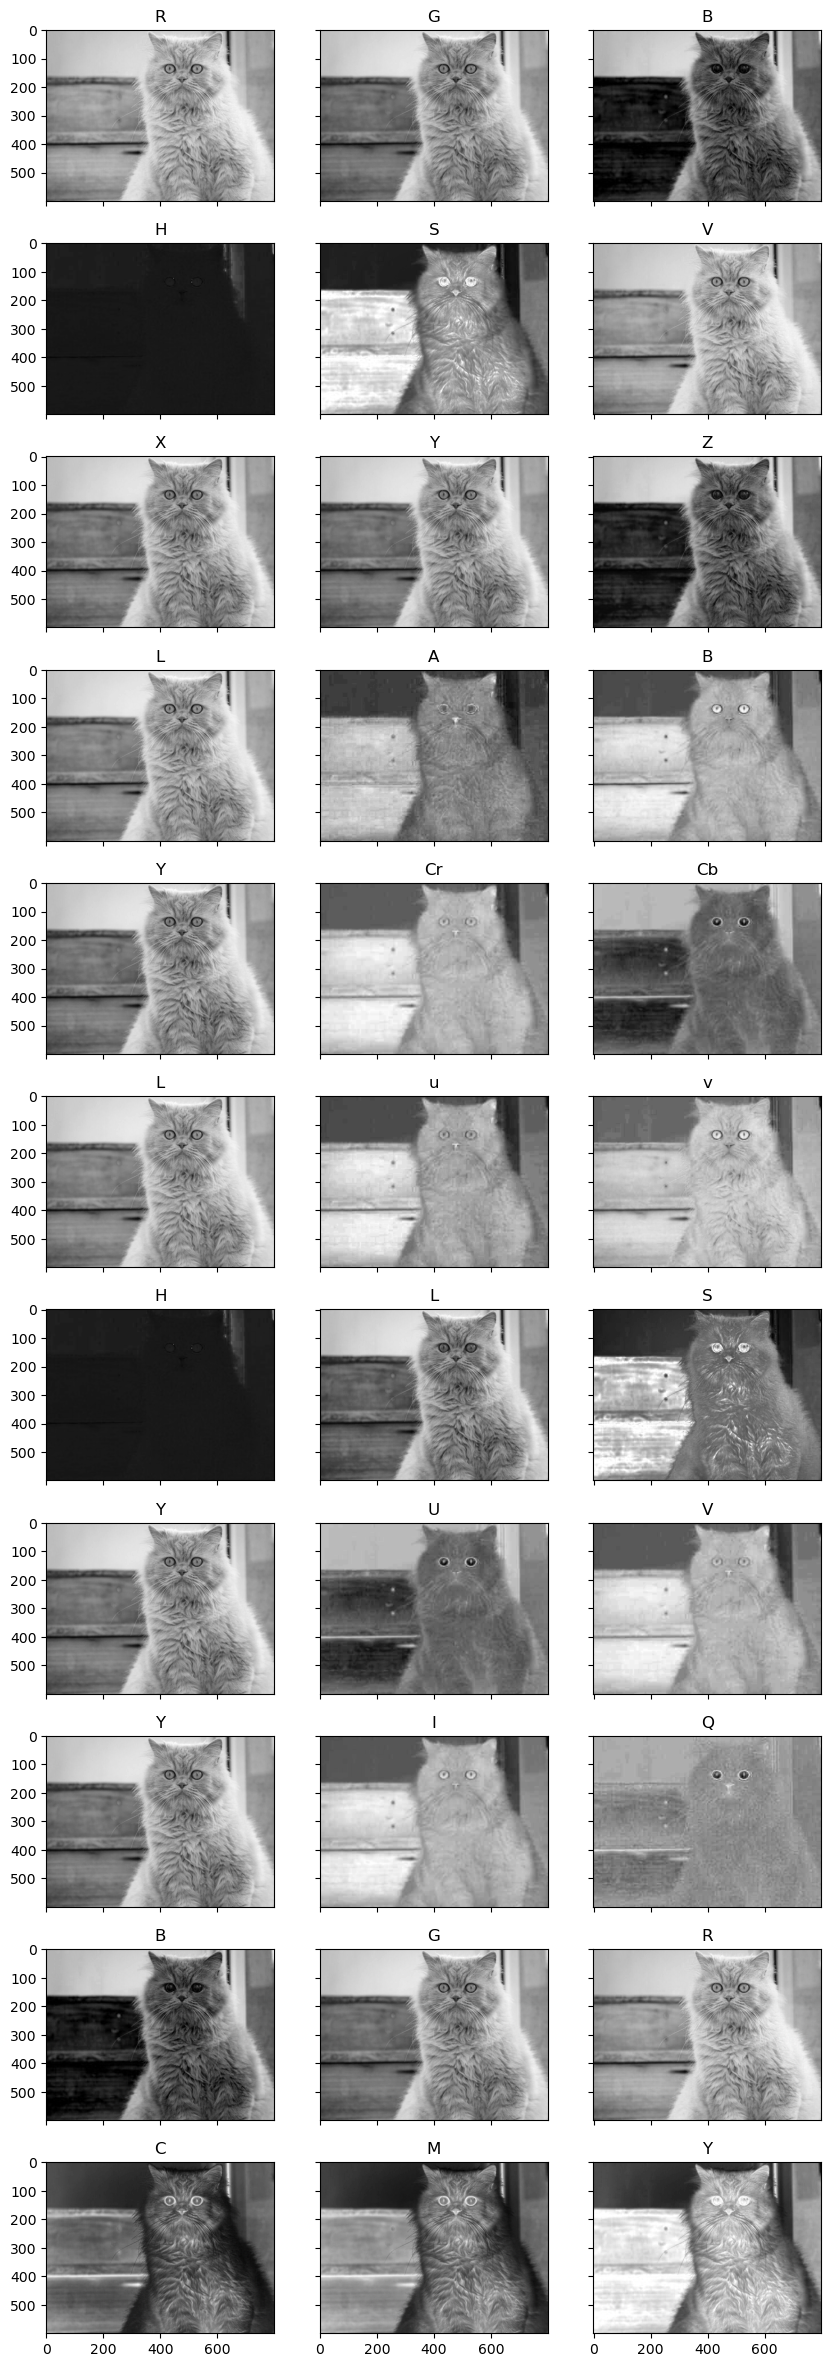

In [7]:
""" Graficamos todos estos espacios de color """

fig, axs = plt.subplots(11, 3, figsize=(10, 30), sharex=True, sharey=True)
# RGB
axs[0, 0].imshow(img_rgb[:,:,0], cmap="gray")
axs[0, 0].set_title("R")
axs[0, 1].imshow(img_rgb[:,:,1], cmap="gray")
axs[0, 1].set_title("G")
axs[0, 2].imshow(img_rgb[:,:,2], cmap="gray")
axs[0, 2].set_title("B")

# HSV
axs[1, 0].imshow(img_hsv[:,:,0], cmap="gray")
axs[1, 0].set_title("H")
axs[1, 1].imshow(img_hsv[:,:,1], cmap="gray")
axs[1, 1].set_title("S")
axs[1, 2].imshow(img_hsv[:,:,2], cmap="gray")
axs[1, 2].set_title("V")

# XYZ
axs[2, 0].imshow(img_xyz[:,:,0], cmap="gray")
axs[2, 0].set_title("X")
axs[2, 1].imshow(img_xyz[:,:,1], cmap="gray")
axs[2, 1].set_title("Y")
axs[2, 2].imshow(img_xyz[:,:,2], cmap="gray")
axs[2, 2].set_title("Z")

# LAB
axs[3, 0].imshow(img_lab[:,:,0], cmap="gray")
axs[3, 0].set_title("L")
axs[3, 1].imshow(img_lab[:,:,1], cmap="gray")
axs[3, 1].set_title("A")
axs[3, 2].imshow(img_lab[:,:,2], cmap="gray")
axs[3, 2].set_title("B")

# YCrCb
axs[4, 0].imshow(img_ycrcb[:,:,0], cmap="gray")
axs[4, 0].set_title("Y")
axs[4, 1].imshow(img_ycrcb[:,:,1], cmap="gray")
axs[4, 1].set_title("Cr")
axs[4, 2].imshow(img_ycrcb[:,:,2], cmap="gray")
axs[4, 2].set_title("Cb")

# Luv
axs[5, 0].imshow(img_luv[:,:,0], cmap="gray")
axs[5, 0].set_title("L")
axs[5, 1].imshow(img_luv[:,:,1], cmap="gray")
axs[5, 1].set_title("u")
axs[5, 2].imshow(img_luv[:,:,2], cmap="gray")
axs[5, 2].set_title("v")

# HLS
axs[6, 0].imshow(img_hls[:,:,0], cmap="gray")
axs[6, 0].set_title("H")
axs[6, 1].imshow(img_hls[:,:,1], cmap="gray")
axs[6, 1].set_title("L")
axs[6, 2].imshow(img_hls[:,:,2], cmap="gray")
axs[6, 2].set_title("S")

# YUV
axs[7, 0].imshow(img_yuv[:,:,0], cmap="gray")
axs[7, 0].set_title("Y")
axs[7, 1].imshow(img_yuv[:,:,1], cmap="gray")
axs[7, 1].set_title("U")
axs[7, 2].imshow(img_yuv[:,:,2], cmap="gray")
axs[7, 2].set_title("V")

# YIQ
axs[8, 0].imshow(img_yiq[:,:,0], cmap="gray")
axs[8, 0].set_title("Y")
axs[8, 1].imshow(img_yiq[:,:,1], cmap="gray")
axs[8, 1].set_title("I")
axs[8, 2].imshow(img_yiq[:,:,2], cmap="gray")
axs[8, 2].set_title("Q");

# BGR
axs[9, 0].imshow(img[:,:,0], cmap="gray")
axs[9, 0].set_title("B")
axs[9, 1].imshow(img[:,:,1], cmap="gray")
axs[9, 1].set_title("G")
axs[9, 2].imshow(img[:,:,2], cmap="gray")
axs[9, 2].set_title("R")

# CMY
axs[10, 0].imshow(img_cmy[:,:,0], cmap="gray")
axs[10, 0].set_title("C")
axs[10, 1].imshow(img_cmy[:,:,1], cmap="gray")
axs[10, 1].set_title("M")
axs[10, 2].imshow(img_cmy[:,:,2], cmap="gray")
axs[10, 2].set_title("Y");

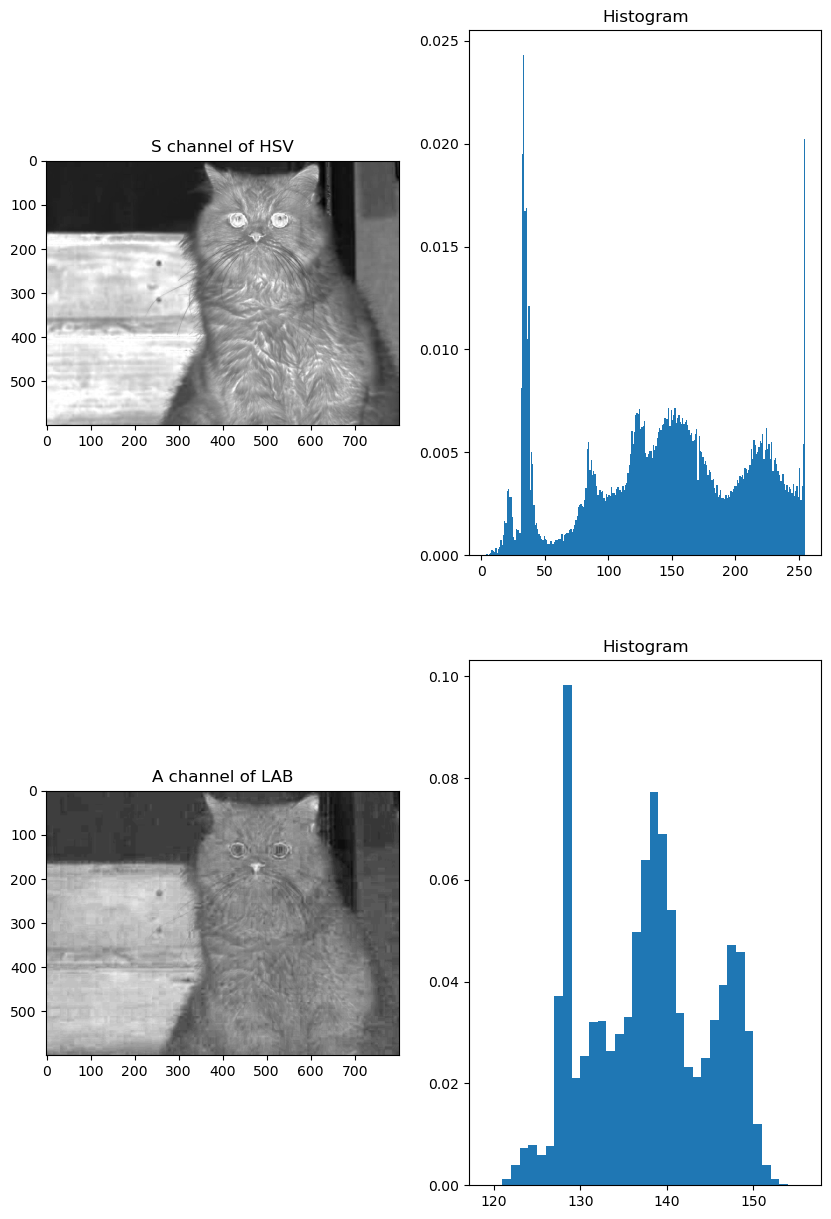

In [8]:
# Como candidatos para una segmentación vamos a elegir el S del HSV y el A del LAB
s_channel = img_hsv[:,:,1].copy()
a_channel = img_lab[:,:,1].copy()

# Vamos a graficarlos junto con su histograma
fig, axes = plt.subplots(2,2, figsize=(10,15))
axes[0][0].imshow(s_channel, cmap='gray')
axes[0][0].set_title('S channel of HSV')
axes[0][1].hist(s_channel.ravel(), bins=(np.max(s_channel) - np.min(s_channel)), density=True)
axes[0][1].set_title('Histogram')

axes[1][0].imshow(a_channel, cmap='gray')
axes[1][0].set_title('A channel of LAB')
axes[1][1].hist(a_channel.ravel(), bins=(np.max(a_channel) - np.min(a_channel)), density=True)
axes[1][1].set_title('Histogram');

<h1>Analizando los histogramas, aunque está complicado, considero que el canal A del LAB tiene una región posible para realizar la umbralización, que es la región intermedia, el  gato está en este canal de color con intensidades intermedias, ni muy oscuras, pero tampoco muy claras</h1>

## Punto 3 (40%)
Utilizando el canal de color seleccionado en el punto anterior, realice la segmentación del objeto de interés. Para la segmentación se espera que se utilicen algunos de los siguientes algoritmos:
- Umbralización.
- Operaciones morfológicas.
- Operaciones lineales.
- Operaciones no lineales

En caso de no utilizar alguno de estos algoritmos, se debe justificar el por qué no se utilizó.

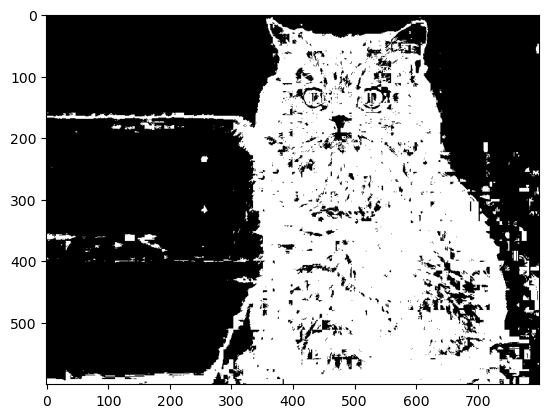

In [9]:
# Comenzamos tomando 2 umbralizaciones, con valores de 140 y 132
_, thr = cv2.threshold(a_channel, 140, 255, cv2.THRESH_BINARY_INV)
_, thr2 = cv2.threshold(a_channel, 132, 255, cv2.THRESH_BINARY)

# Juntamos las umbralizaciones
img_pre = cv2.bitwise_and(thr,thr2)

plt.imshow(img_pre, cmap='gray');

/tmp/ipykernel_9874/1440818647.py:2: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  pre_mask = morph.remove_small_holes(img_pre, 5000).astype(np.uint8)


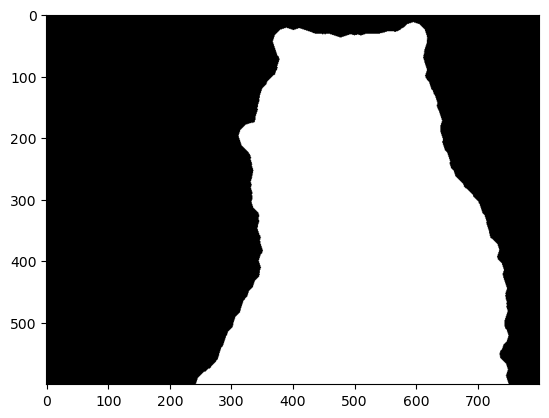

In [10]:
# Aplicamos ahora operaciones morfológicas para limpiar píxeles basura en la imagen
pre_mask = morph.remove_small_holes(img_pre, 5000).astype(np.uint8)

# Aplicamos un pequeño closing para unir unos bordes en la oreja
pre_mask = morph.binary_closing(pre_mask, morph.disk(5)).astype(np.uint8)

# Podemos rellenarlo con un píxel semilla y region growing
pre_mask = morph.flood_fill(pre_mask, (40,580), 1).astype(np.uint8)

# Ahora para remover todo lo que no sea el gato, vamos a hacer una operación de apertura
mask = cv2.morphologyEx(pre_mask, cv2.MORPH_OPEN, morph.disk(7), iterations=3)
plt.imshow(mask, cmap='gray');

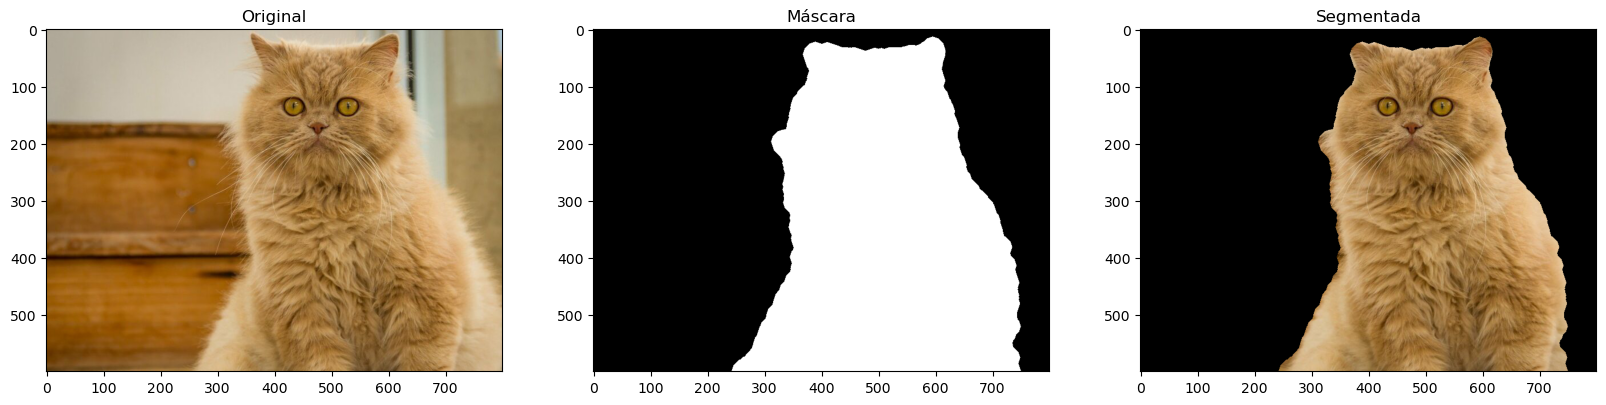

In [11]:
""" RESULTADO FINAL """
# Aplicamos la máscara y segmentamos
gato_segmented = cv2.bitwise_and(gato_rgb, gato_rgb, mask = mask)
fig, (g1, g2, g3) = plt.subplots(1,3,figsize = (20,16))
g1.imshow(gato_rgb)
g1.set_title('Original')
g2.imshow(mask, cmap='gray')
g2.set_title('Máscara')
g3.imshow(gato_segmented)
g3.set_title('Segmentada');

# ¿Cómo enviar el parcial resuelto?


Para entregar el parcial resuelto, siga los siguientes pasos:

1. Asegúrese de ejecutar todas las celdas en su cuaderno Jupyter, de manera que todos los resultados y gráficos estén actualizados.
<br></br>
2. Guarde el cuaderno Jupyter para conservar los cambios realizados.
<br></br>
3. Reúna todas las imágenes de referencia utilizadas en el cuaderno Jupyter en una sola carpeta.
<br></br>
4. Comprima el cuaderno Jupyter y la carpeta de imágenes en un archivo ZIP/RAR o comprimido. Asegúrese de que el archivo comprimido contenga tanto el cuaderno como las imágenes de referencia.
<br></br>
5. Envíe el archivo ZIP/RAR comprimido como respuesta al correo electrónico en el que se envió el parcial. No olvide incluir al monitor en copia (sasalazarr@unal.edu.co) al enviar su respuesta.

Al seguir estos pasos, garantizará que el profesor y el monitor reciban su parcial resuelto junto con las imágenes de referencia utilizadas en su cuaderno Jupyter.


<b> Plazo para enviar el parcial: </b> Miercoles 29 de enero del 2025, antes de las 12:00 (horario de clase).
